In [1]:
# %pip install torch
# %pip install tensorflow
# %pip install opencv-python
# %pip install numpy
# %pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [24]:
import tensorflow as tf 
import cv2 
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

In [25]:
# X_train_path = "DOTAv1\\images\\train"
# Y_train_path = "DOTAv1\\labels\\train"
# X_val_path = "DOTAv1\\images\\val"
# Y_val_path = "DOTAv1\\labels\\val"
# X_test_path = "DOTAv1\\images\\test"

# X_train = os.listdir(X_train_path)
# Y_train = os.listdir(Y_train_path)


# X_val = os.listdir(X_val_path)
# Y_val = os.listdir(Y_val_path)
# X_test = os.listdir(X_test_path)
# # print(len(X_train), len(Y_train))
# # print(len(X_val), len(Y_val))
# # print(len(X_test))

# print(len(X_train))
# print(len(Y_train))

input_folder = "DOTAv1\\images\\train"
output_folder = "DOTAv1\\preprocessed_images\\train"
input_labels_folder = "DOTAv1\\labels\\train"
output_labels_folder = "DOTAv1\\preprocessed_labels\\train"

In [26]:
input_folder = "DOTAv1\\images\\train"
output_folder = "DOTAv1\\preprocessed_images\\train"
input_labels_folder = "DOTAv1\\labels\\train"
output_labels_folder = "DOTAv1\\preprocessed_labels\\train"

os.makedirs(output_folder, exist_ok=True)
os.makedirs(output_labels_folder, exist_ok=True)
def sharpen_image(image):
    kernel = np.array([[0, -1, 0],
                       [-1, 5,-1],
                       [0, -1, 0]])
    sharpened = cv2.filter2D(image, -1, kernel)
    return sharpened

def resize_image(input_path, output_path, input_label_path, output_label_path, target_size=(400, 400)):
    try:
        img = cv2.imread(input_path, cv2.IMREAD_GRAYSCALE)
        previous_size = img.shape[0]

        resized_img = cv2.resize(img, target_size, interpolation=cv2.INTER_AREA)
        resized_img = resized_img.reshape((448, 448, 1))
        # resized_img = resized_img.astype(np.float32) / 255.0
        sharpened_image = sharpen_image(resized_img)
        cv2.imwrite(output_path, sharpened_image)
        print(resized_img.shape)
        # with open(input_label_path, 'r') as infile, open(output_label_path, 'w') as outfile:
        #     for line in infile:
        #         parts = line.strip().split()
        #         if len(parts) == 9:  # Ensure we have class_id and 8 coordinates
        #             class_id = int(parts[0])
        #             coords = [float(x) for x in parts[1:]]

        #             # Calculate bounding box from polygon
        #             x_min = min(coords[0::2])
        #             y_min = min(coords[1::2])
        #             x_max = max(coords[0::2])
        #             y_max = max(coords[1::2])

        #             # Convert to center, width, height format and normalize
        #             x_center = (x_min + x_max) / 2
        #             y_center = (y_min + y_max) / 2 
        #             width = (x_max - x_min)
        #             height = (y_max - y_min) 

        #             # Write new label
        #             outfile.write(f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n")

        # print(f"Processed {input_path} and {input_label_path}")
        # print(f"Processed {input_path} and {input_label_path}")
    
    except Exception as e:
        print(f"Error processing {input_path}: {e}")

In [27]:
for filename in os.listdir(input_folder):
    if filename.endswith(".jpg"):
        input_path = os.path.join(input_folder, filename)
        output_path = os.path.join(output_folder, filename)
        label_file_name = filename.replace(".jpg", ".txt")
        input_label_path = os.path.join(input_labels_folder, label_file_name)
        output_label_path = os.path.join(output_labels_folder, label_file_name)
        
        resize_image(input_path, output_path, input_label_path=input_label_path, output_label_path=output_label_path, target_size=(448, 448))

(448, 448, 1)
(448, 448, 1)
(448, 448, 1)
(448, 448, 1)
(448, 448, 1)
(448, 448, 1)
(448, 448, 1)
(448, 448, 1)
(448, 448, 1)
(448, 448, 1)
(448, 448, 1)
(448, 448, 1)
(448, 448, 1)
(448, 448, 1)
(448, 448, 1)
(448, 448, 1)
(448, 448, 1)
(448, 448, 1)
(448, 448, 1)
(448, 448, 1)
(448, 448, 1)
(448, 448, 1)
(448, 448, 1)
(448, 448, 1)
(448, 448, 1)
(448, 448, 1)
(448, 448, 1)
(448, 448, 1)
(448, 448, 1)
(448, 448, 1)
(448, 448, 1)
(448, 448, 1)
(448, 448, 1)
(448, 448, 1)
(448, 448, 1)
(448, 448, 1)
(448, 448, 1)
(448, 448, 1)
(448, 448, 1)
(448, 448, 1)
(448, 448, 1)
(448, 448, 1)
(448, 448, 1)
(448, 448, 1)
(448, 448, 1)
(448, 448, 1)
(448, 448, 1)
(448, 448, 1)
(448, 448, 1)
(448, 448, 1)
(448, 448, 1)
(448, 448, 1)
(448, 448, 1)
(448, 448, 1)
(448, 448, 1)
(448, 448, 1)
(448, 448, 1)
(448, 448, 1)
(448, 448, 1)
(448, 448, 1)
(448, 448, 1)
(448, 448, 1)
(448, 448, 1)
(448, 448, 1)
(448, 448, 1)
(448, 448, 1)
(448, 448, 1)
(448, 448, 1)
(448, 448, 1)
(448, 448, 1)
(448, 448, 1)
(448, 

In [28]:
import os
import cv2
import numpy as np
import tensorflow as tf
import random

import os
import cv2
import numpy as np
import tensorflow as tf
import random

def data_load(output_folder, input_labels_folder):
    X = []
    Y = []
    
    FIXED_LABELS = 10
    PADDING_CLASS = 15
    limit = 100
    for file in os.listdir(output_folder):
        if file.endswith('.jpg'):
            img_path = os.path.join(output_folder, file)
            label_file = file.replace('.jpg', '.txt')
            label_path = os.path.join(input_labels_folder, label_file)
            
            with open(label_path, 'r') as f:
                lines = f.readlines()
            
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = img.astype(np.float32) / 255.0

            if len(lines) <= FIXED_LABELS:
                # Pad labels if less than 10
                # labels = np.zeros((FIXED_LABELS, 9), dtype=np.float32)
                # for i, line in enumerate(lines):
                #     labels[i] = np.array(line.strip().split(), dtype=np.float32)
                # # Set remaining rows to have class 15 and all other values as 0
                # for i in range(len(lines), FIXED_LABELS):
                #     labels[i, 0] = PADDING_CLASS
                # X.append(img)
                # Y.append(labels)
                continue
            
            else:
                # If there are more than 10 labels, iterate over all labels
                for i in range(0, len(lines), FIXED_LABELS):
                    # batch_lines = lines[i:i+FIXED_LABELS]
                    labels = np.zeros((FIXED_LABELS, 9), dtype=np.float32)
                    # for j, line in enumerate(batch_lines):
                    #     labels[j] = np.array(line.strip().split(), dtype=np.float32)
                    # If this batch has fewer than 10 labels, pad the remaining
                    # for j in range(len(batch_lines), FIXED_LABELS):
                    #     labels[j, 0] = PADDING_CLASS
                    if i + FIXED_LABELS > len(lines):
                        break
                    else:
                        batch_lines = lines[i : i + FIXED_LABELS]
                        for j, line in enumerate(batch_lines):
                            labels[j] = np.array(line.strip().split(), dtype=np.float32)
                    X.append(img)
                    Y.append(labels)
    
    X = np.array(X)
    Y = np.array(Y)
    
    # Add channel dimension
    X = np.expand_dims(X, axis=-1)
    
    # Convert to TensorFlow tensors
    X = tf.convert_to_tensor(X, dtype=tf.float32)
    Y = tf.convert_to_tensor(Y, dtype=tf.float32)
    
    # Create TensorFlow dataset
    dataset = tf.data.Dataset.from_tensor_slices((X, Y))
    
    return dataset

  # Print first 5 label rows

# dataset = data_load(output_folder, input_labels_folder)

In [29]:
# Usage
dataset = data_load(output_folder, input_labels_folder)

# You can then use this dataset directly or apply further transformations

# Example of checking the dataset
for image, labels in dataset.take(1):
    print("Image shape:", image.shape)
    print("Labels shape:", labels.shape)
    print("Sample labels:")
    print(pd.DataFrame(labels).tail())

Image shape: (448, 448, 1)
Labels shape: (10, 9)
Sample labels:
      0         1         2         3         4         5         6         7  \
5  10.0  0.164129  0.311341  0.163355  0.310069  0.166710  0.308615  0.167742   
6  10.0  0.185032  0.013813  0.187355  0.014177  0.186323  0.017266  0.184258   
7  10.0  0.190194  0.014904  0.192000  0.015267  0.190710  0.018357  0.188645   
8  10.0  0.169806  0.043984  0.167226  0.043075  0.169548  0.040349  0.172129   
9  10.0  0.189677  0.022174  0.194581  0.023446  0.193548  0.024718  0.189161   

          8  
5  0.310069  
6  0.016358  
7  0.017812  
8  0.040894  
9  0.023264  


0 [568.3616, 590.6583999999999, 596.232, 579.0968] [350.1272, 346.7832, 358.8512, 363.79519999999997]


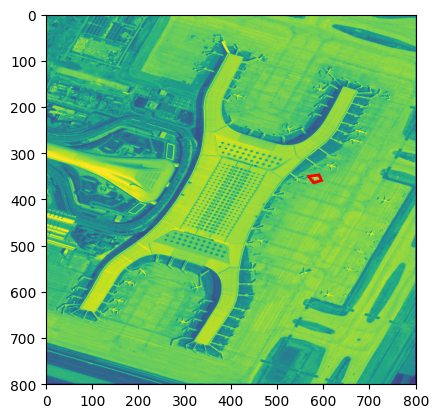

In [ ]:
# model = tf.keras.Model(inputs = inputs, outputs = ["classifier_head", "regressor_head"])
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import matplotlib.image as mpimg
import os
image = os.path.join(output_folder, os.listdir(output_folder)[0])
img = cv2.imread(image, cv2.IMREAD_GRAYSCALE)

text_file = os.listdir(output_folder)[0].replace(".jpg", ".txt")

coords_x = []
coords_y = []
with open(os.path.join(input_labels_folder, text_file), "r") as f:
    line = f.readlines()[0]
    line = line.split()
    label = line[0]
    coords_x = [float(elt) * 800 for elt in line[1:9:2]]
    coords_y = [float(elt) * 800 for elt in line[2:9:2]]

print(label, coords_x, coords_y)


# Define the coordinates of the polygon

points = list(zip(coords_x, coords_y))

# Load the image
image_path = image  # Replace with your image path
img = mpimg.imread(image_path)

# Create a new figure and axis
fig, ax = plt.subplots()

# Display the image
ax.imshow(img)

# Create the polygon and add it to the plot
polygon = Polygon(points, closed=True, fill=None, edgecolor='r', linewidth=2)
ax.add_patch(polygon)

# Set the x and y axis limits to show the entire image
ax.set_xlim(0, img.shape[1])
ax.set_ylim(img.shape[0], 0)

# Show the plot
plt.show()

In [30]:
import tensorflow as tf

def one_hot_encoding(image, labels, max_labels, num_classes=15):
    # Create a mask for valid labels (class_id != 15)
    # mask = tf.not_equal(labels[:, 0], 15)
    
    # Apply mask to get only valid labels
    # valid_labels = tf.boolean_mask(labels, mask)
    
    # Convert class IDs to integers and apply one-hot encoding
    class_ids = tf.cast(labels[:, 0], tf.int32)
    one_hot_classes = tf.one_hot(class_ids, num_classes)
    
    # Extract bounding box coordinates
    bounding_boxes = labels[:, 1:]
    
    # Calculate the number of valid labels
    num_valid_labels = tf.shape(labels)[0]
    
    # Ensure we don't have negative padding
    padding_size = tf.maximum(0, max_labels - num_valid_labels)
    
    # Combine one-hot encoded classes with bounding box coordinates
    # paddings_class = [[0, padding_size], [0, 0]]
    # paddings_box = [[0, padding_size], [0, 0]]
    
    # one_hot_classes_padded = tf.pad(one_hot_classes, paddings_class, constant_values=0)
    # bounding_boxes_padded = tf.pad(bounding_boxes, paddings_box, constant_values=0)
    
    # Ensure the output tensors have the correct shape
    one_hot_classes_padded = tf.ensure_shape(one_hot_classes, [max_labels, num_classes])
    bounding_boxes_padded = tf.ensure_shape(bounding_boxes, [max_labels, 8])
    
    return image, (one_hot_classes_padded, bounding_boxes_padded)


def tune_dataset(dataset, max_labels, batch_size, num_classes=15, shuffle=True, cache=True, prefetch=True):
    """
    Tune the dataset by applying one-hot encoding, batching, and optimizing performance.
    
    Args:
    dataset (tf.data.Dataset): The input dataset.
    max_labels (int): Maximum number of labels per image.
    batch_size (int): The size of batches to create.
    num_classes (int): Number of classes for one-hot encoding.
    shuffle (bool): Whether to shuffle the dataset.
    cache (bool): Whether to cache the dataset.
    prefetch (bool): Whether to prefetch batches.
    
    Returns:
    tf.data.Dataset: The tuned dataset.
    """
    
    # Apply one-hot encoding
    dataset = dataset.map(
        lambda img, labels: one_hot_encoding(img, labels, max_labels, num_classes),
        num_parallel_calls=tf.data.AUTOTUNE
    )
    
    # Cache the dataset if requested
    if cache:
        dataset = dataset.cache()
    
    # Shuffle the dataset if requested
    if shuffle:
        dataset = dataset.shuffle(buffer_size=1000)
    
    # Batch the dataset
    dataset = dataset.batch(batch_size)
    
    # Prefetch batches if requested
    if prefetch:
        dataset = dataset.prefetch(tf.data.AUTOTUNE)
    
    return dataset


# Apply the one-hot encoding to the dataset
# one_hot_encoded_dataset = dataset.map(lambda x, y: one_hot_encoding(x, y, num_classes=15, max_labels=10))
# # Tune the dataset for training
train_dataset = tune_dataset(dataset, max_labels=10, batch_size=8)
print(train_dataset)

# Inspect a batch from the dataset
for image, labels in train_dataset.take(1):
    print("Image shape:", image.shape)
    print("Labels shape:", labels[0].shape, labels[1].shape)
    print("First label:", labels[0])
    print("Labels length: ", len(labels))  # First label of first image in batch

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 448, 448, 1), dtype=tf.float32, name=None), (TensorSpec(shape=(None, 10, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10, 8), dtype=tf.float32, name=None)))>
Image shape: (8, 448, 448, 1)
Labels shape: (8, 10, 15) (8, 10, 8)
First label: tf.Tensor(
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 

In [90]:
valid_input_images = "DOTAv1\\images\\val"
valid_output_images = "DOTAv1\\preprocessed_images\\val"

os.makedirs(valid_output_images, exist_ok=True)

for file in os.listdir(valid_input_images):
    filepath = os.path.join(valid_input_images, file)
    output_path = os.path.join(valid_output_images, file)
    resize_image(filepath, output_path)


(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 

In [91]:
validation_labels_folder = "DOTAv1\\labels\\val"

validation_dataset, max_labels_v = data_load(valid_output_images, validation_labels_folder)

for image, labels in validation_dataset.take(1):
    print("Image shape", image.shape)
    print("Label shape : ", labels.shape)
    print("Sample labels:")
    print(pd.DataFrame(labels).tail())

458
Image shape (400, 400, 1)
Label shape :  (1401, 9)
Sample labels:
        0    1    2    3    4    5    6    7    8
1396 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0
1397 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0
1398 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0
1399 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0
1400 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0


In [92]:
one_hot_encoded_validation = validation_dataset.map(lambda x, y: one_hot_encoding(x, y, num_classes=15, max_labels=max_labels_v))
Validation_dataset = tune_training_ds(one_hot_encoded_validation)
for image, labels in Validation_dataset.take(1):
    print("Image shape:", image.shape)
    print("Labels shape:", labels[0].shape, labels[1].shape)
    # print("First label:", labels[0, 0])
    print("Labels length: ", len(labels))


Image shape: (16, 400, 400, 1)
Labels shape: (16, 1401, 15) (16, 1401, 8)
Labels length:  2


In [93]:
def build_regressor(inputs):

    x = tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu', input_shape=(400, 400, 1))(inputs)
    x = tf.keras.layers.MaxPooling2D(2,2)(x)

    x = tf.keras.layers.Conv2D(128, kernel_size=3, activation = 'relu')(x)
    x = tf.keras.layers.MaxPooling2D(2,2)(x)

    x = tf.keras.layers.Conv2D(256, kernel_size=3, activation = 'relu')(x)
    x = tf.keras.layers.MaxPooling2D(2,2)(x)
    
    x = tf.keras.layers.Conv2D(128, kernel_size=3, activation = 'relu')(x)
    x = tf.keras.layers.MaxPooling2D(2,2)(x)

    x = tf.keras.layers.Flatten()(inputs)
    x = tf.keras.layers.Dense(64, activation='relu')(x)
    
    x = tf.keras.layers.Dense(units = 8, name="regressor_head")(x)

    return x

In [37]:
no_of_classes = 15

def build_classifier(inputs):
    x = tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu', input_shape=(400, 400, 1), padding="same")(inputs)
    x = tf.keras.layers.MaxPooling2D(2,2)(x)

    x = tf.keras.layers.Conv2D(128, kernel_size=3, activation = 'relu', padding="same")(x)
    x = tf.keras.layers.MaxPooling2D(2,2)(x)

    x = tf.keras.layers.Conv2D(256, kernel_size=3, activation = 'relu', padding="same")(x)
    x = tf.keras.layers.MaxPooling2D(2,2)(x)

    x = tf.keras.layers.Conv2D(128, kernel_size=3, activation = 'relu', padding="same")(x)
    x = tf.keras.layers.MaxPooling2D(2,2)(x)

    x = tf.keras.layers.Flatten()(inputs)
    x = tf.keras.layers.Dense(64, activation = 'relu')(x)

    x = tf.keras.layers.Dense(no_of_classes, activation='softmax', name="classifier_head")(x)

    return x

In [40]:
def build_model(inputs):
    classification_head = build_classifier(inputs)
    regressor_head = build_regressor(inputs)
    model = tf.keras.Model(inputs = inputs, outputs = [classification_head, regressor_head])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss={"classifier_head" : "categorical_crossentropy", "regressor_head" : "mse"}, metrics = {"classifier_head" : "accuracy", "regressor_head" : "mse"})
    return model

In [41]:
model = build_model(tf.keras.layers.Input(shape=(300, 300, 1)))
model.summary()

C:\Users\adity\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 800, 800,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_8 (Flatten) │ (None, 640000)    │          0 │ input_layer_5[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_9 (Flatten) │ (None, 640000)    │          0 │ input_layer_5[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 64)        │ 40,960,064 │ flatten_8[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 64)        │ 40,960,064 │ flatten_9[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ classifier_head     │ (None, 15)        │        975 │ dense_8[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ regressor_head      │ (None, 8)         │        520 │ dense_9[0][0]     │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 81,921,623 (312.51 MB)

 Trainable params: 81,921,623 (312.51 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
def build_shared_layers(inputs):
    x = tf.keras.layers.Conv2D(64, kernel_size=7, padding="same", strides=(2, 2))(inputs)
    x = tf.keras.layers.LeakyReLU(negative_slope=0.2)(x)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    
    x = tf.keras.layers.Conv2D(192, kernel_size=3, padding="same")(x)
    x = tf.keras.layers.LeakyReLU(negative_slope=0.2)(x)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    
    x = tf.keras.layers.Conv2D(128, kernel_size=1, padding="same")(x)
    x = tf.keras.layers.LeakyReLU(negative_slope=0.2)(x)
    x = tf.keras.layers.Conv2D(256, kernel_size=3, padding="same")(x)
    x = tf.keras.layers.LeakyReLU(negative_slope=0.2)(x)
    x = tf.keras.layers.Conv2D(256, kernel_size=1, padding="same")(x)
    x = tf.keras.layers.LeakyReLU(negative_slope=0.2)(x)
    x = tf.keras.layers.Conv2D(512, kernel_size=3, padding="same")(x)
    x = tf.keras.layers.LeakyReLU(negative_slope=0.2)(x)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    
    x = tf.keras.layers.Conv2D(256, kernel_size=1, padding="same")(x)
    x = tf.keras.layers.LeakyReLU(negative_slope=0.2)(x)
    x = tf.keras.layers.Conv2D(512, kernel_size=3, padding="same")(x)
    x = tf.keras.layers.LeakyReLU(negative_slope=0.2)(x)

    x = tf.keras.layers.Conv2D(256, kernel_size=1, padding="same")(x)
    x = tf.keras.layers.LeakyReLU(negative_slope=0.2)(x)
    x = tf.keras.layers.Conv2D(512, kernel_size=3, padding="same")(x)
    x = tf.keras.layers.LeakyReLU(negative_slope=0.2)(x)

    x = tf.keras.layers.Conv2D(256, kernel_size=1, padding="same")(x)
    x = tf.keras.layers.LeakyReLU(negative_slope=0.2)(x)
    x = tf.keras.layers.Conv2D(512, kernel_size=3, padding="same")(x)
    x = tf.keras.layers.LeakyReLU(negative_slope=0.2)(x)

    x = tf.keras.layers.Conv2D(256, kernel_size=1, padding="same")(x)
    x = tf.keras.layers.LeakyReLU(negative_slope=0.2)(x)
    x = tf.keras.layers.Conv2D(512, kernel_size=3, padding="same")(x)
    x = tf.keras.layers.LeakyReLU(negative_slope=0.2)(x)
    x = tf.keras.layers.Conv2D(512, kernel_size=1, padding="same")(x)
    x = tf.keras.layers.LeakyReLU(negative_slope=0.2)(x)
    x = tf.keras.layers.Conv2D(1024, kernel_size=1, padding="same")(x)
    x = tf.keras.layers.LeakyReLU(negative_slope=0.2)(x)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    
    x = tf.keras.layers.Conv2D(512, kernel_size=1, padding="same")(x)
    x = tf.keras.layers.LeakyReLU(negative_slope=0.2)(x)
    x = tf.keras.layers.Conv2D(1024, kernel_size=3, padding="same")(x)
    x = tf.keras.layers.LeakyReLU(negative_slope=0.2)(x)

    x = tf.keras.layers.Conv2D(512, kernel_size=1, padding="same")(x)
    x = tf.keras.layers.LeakyReLU(negative_slope=0.2)(x)
    x = tf.keras.layers.Conv2D(1024, kernel_size=3, padding="same")(x)
    x = tf.keras.layers.LeakyReLU(negative_slope=0.2)(x)
    x = tf.keras.layers.Conv2D(1024, kernel_size=3, padding="same")(x)
    x = tf.keras.layers.LeakyReLU(negative_slope=0.2)(x)
    x = tf.keras.layers.Conv2D(1024, kernel_size=3, padding="same", strides=(2, 2))(x)
    x = tf.keras.layers.LeakyReLU(negative_slope=0.2)(x)
    # x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    

    x = tf.keras.layers.Flatten()(x)
    
    return x

def build_model(input_shape, num_classes=15, max_labels=10):
    inputs = tf.keras.layers.Input(shape=input_shape)
    shared_features = build_shared_layers(inputs)
    
    # Classification output
    classification_output = tf.keras.layers.Dense(max_labels * num_classes, activation='softmax')(shared_features)
    classification_output = tf.keras.layers.Reshape((max_labels, num_classes), name='classification_output')(classification_output)
    
    # Regression output
    x = tf.keras.layers.Dense(1024)(shared_features)
    x = tf.keras.layers.LeakyReLU(negative_slope=0.2)(x)
    x = tf.keras.layers.Dense(512)(x)
    x = tf.keras.layers.LeakyReLU(negative_slope=0.2)(x)
    x = tf.keras.layers.Dense(256)(x)
    x = tf.keras.layers.LeakyReLU(negative_slope=0.2)(x)
    x = tf.keras.layers.Dense(192)(x)
    x = tf.keras.layers.LeakyReLU(negative_slope=0.2)(x)
    x = tf.keras.layers.Dense(128)(x)
    x = tf.keras.layers.LeakyReLU(negative_slope=0.2)(x)
    x = tf.keras.layers.Dense(64)(x)
    x = tf.keras.layers.LeakyReLU(negative_slope=0.2)(x)
    regression_output = tf.keras.layers.Dense(max_labels * 8)(x)
    regression_output = tf.keras.layers.Reshape((max_labels, 8), name='regression_output')(regression_output)
    
    model = tf.keras.Model(inputs=inputs, outputs=[classification_output, regression_output])
    
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
        loss={
            'classification_output': 'categorical_crossentropy',
            'regression_output': smooth_l1_loss  # Using IoU as the loss function for bounding boxes
        },
        loss_weights={
            'classification_output': 1.0,
            'regression_output': 1.0
        },
        metrics={
            'classification_output': 'accuracy',
            'regression_output': iou_metric  # Using IoU as a metric for bounding boxes
        }
    )
    
    return model

def polygon_area(x, y):
    """Calculate the area of a polygon given its vertices."""
    return 0.5 * tf.abs(tf.reduce_sum(x[:-1] * y[1:]) + x[-1] * y[0] - tf.reduce_sum(y[:-1] * x[1:]) - y[-1] * x[0])

def iou_metric(y_true, y_pred):
    y_true = tf.reshape(y_true, [-1, 8])
    y_pred = tf.reshape(y_pred, [-1, 8])
    
    x1, y1, x2, y2, x3, y3, x4, y4 = tf.split(y_true, 8, axis=-1)
    x1_p, y1_p, x2_p, y2_p, x3_p, y3_p, x4_p, y4_p = tf.split(y_pred, 8, axis=-1)

    true_area = polygon_area(x1, y1) + polygon_area(x2, y2) + polygon_area(x3, y3) + polygon_area(x4, y4)
    pred_area = polygon_area(x1_p, y1_p) + polygon_area(x2_p, y2_p) + polygon_area(x3_p, y3_p) + polygon_area(x4_p, y4_p)

    xi1 = tf.maximum(x1, x1_p)
    yi1 = tf.maximum(y1, y1_p)
    xi2 = tf.minimum(x2, x2_p)
    yi2 = tf.minimum(y2, y2_p)
    xi3 = tf.minimum(x3, x3_p)
    yi3 = tf.minimum(y3, y3_p)
    xi4 = tf.minimum(x4, x4_p)
    yi4 = tf.minimum(y4, y4_p)

    inter_area = polygon_area(xi1, yi1) + polygon_area(xi2, yi2) + polygon_area(xi3, yi3) + polygon_area(xi4, yi4)
    
    union_area = true_area + pred_area - inter_area

    iou = inter_area / tf.maximum(union_area, 1e-10)
    return tf.reduce_mean(iou)

def smooth_l1_loss(y_true, y_pred):
    # Assuming y_true and y_pred are shaped (batch_size, 8)
    loss = tf.where(tf.less(tf.abs(y_true - y_pred), 1), 
                    0.5 * tf.square(y_true - y_pred), 
                    tf.abs(y_true - y_pred) - 0.5)
    return tf.reduce_mean(loss)

In [38]:
model = build_model((448, 448, 1))
model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 448, 448,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_66 (Conv2D)  │ (None, 224, 224,  │      3,200 │ input_layer_3[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_56      │ (None, 224, 224,  │          0 │ conv2d_66[0][0]   │
│ (LeakyReLU)         │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_12    │ (None, 112, 112,  │          0 │ leaky_re_lu_56[0… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_67 (Conv2D)  │ (None, 112, 112,  │    110,784 │ max_pooling2d_12… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_57      │ (None, 112, 112,  │          0 │ conv2d_67[0][0]   │
│ (LeakyReLU)         │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_13    │ (None, 56, 56,    │          0 │ leaky_re_lu_57[0… │
│ (MaxPooling2D)      │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_68 (Conv2D)  │ (None, 56, 56,    │     24,704 │ max_pooling2d_13… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_58      │ (None, 56, 56,    │          0 │ conv2d_68[0][0]   │
│ (LeakyReLU)         │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_69 (Conv2D)  │ (None, 56, 56,    │    295,168 │ leaky_re_lu_58[0… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_59      │ (None, 56, 56,    │          0 │ conv2d_69[0][0]   │
│ (LeakyReLU)         │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_70 (Conv2D)  │ (None, 56, 56,    │     65,792 │ leaky_re_lu_59[0… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_60      │ (None, 56, 56,    │          0 │ conv2d_70[0][0]   │
│ (LeakyReLU)         │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_71 (Conv2D)  │ (None, 56, 56,    │  1,180,160 │ leaky_re_lu_60[0… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_61      │ (None, 56, 56,    │          0 │ conv2d_71[0][0]   │
│ (LeakyReLU)         │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_14    │ (None, 28, 28,    │          0 │ leaky_re_lu_61[0… │
│ (MaxPooling2D)      │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_72 (Conv2D)  │ (None, 28, 28,    │    131,328 │ max_pooling2d_14

 Total params: 96,730,406 (369.00 MB)

 Trainable params: 96,730,406 (369.00 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
history = model.fit(
    train_dataset, 
    epochs=100,
    steps_per_epoch = 10   # Adjust based on your dataset size
    # validation_data=validation_dataset,  # If you have a validation dataset
    # validation_steps=50  # Adjust based on your validation dataset size
)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 33s 3s/step - classification_output_accuracy: 0.4451 - loss: 2.8129 - regression_output_iou_metric: 0.2669
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - classification_output_accuracy: 0.2699 - loss: 2.3014 - regression_output_iou_metric: 0.3326
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - classification_output_accuracy: 0.1396 - loss: 2.2406 - regression_output_iou_metric: 0.5293
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - classification_output_accuracy: 0.5969 - loss: 1.6833 - regression_output_iou_metric: 1.2887
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - classification_output_accuracy: 0.4574 - loss: 1.8411 - regression_output_iou_metric: 1.4720
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - classification_output_accuracy: 0.4840 - loss: 1.6073 - regression_output_iou_metric: 2.7571
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - classification_output_accuracy: 0.3457 - loss: 1.9665 - regression_outp

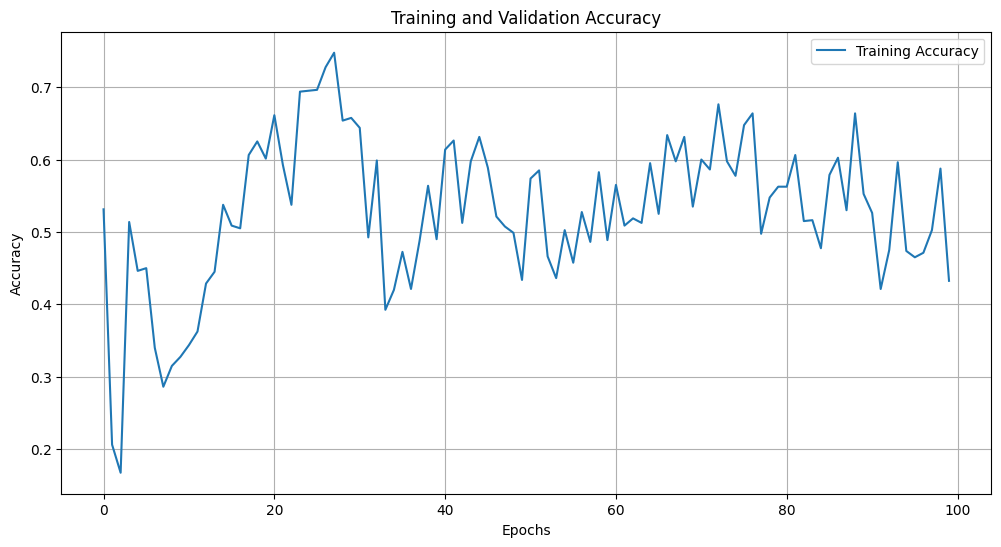

In [40]:
history_dict = history.history
accuracy = history_dict.get('classification_output_accuracy')  # Or use 'classification_output_accuracy' if your metric has a different name
# val_accuracy = history_dict.get('val_accuracy')  # Or use 'val_classification_output_accuracy'

# Plot accuracy
plt.figure(figsize=(12, 6))

plt.plot(accuracy, label='Training Accuracy')
# plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
Class ID: 10
0.4082826 0.4264592 0.3928966 0.42967013 0.41858703 0.4096493 0.4070908 0.38492382


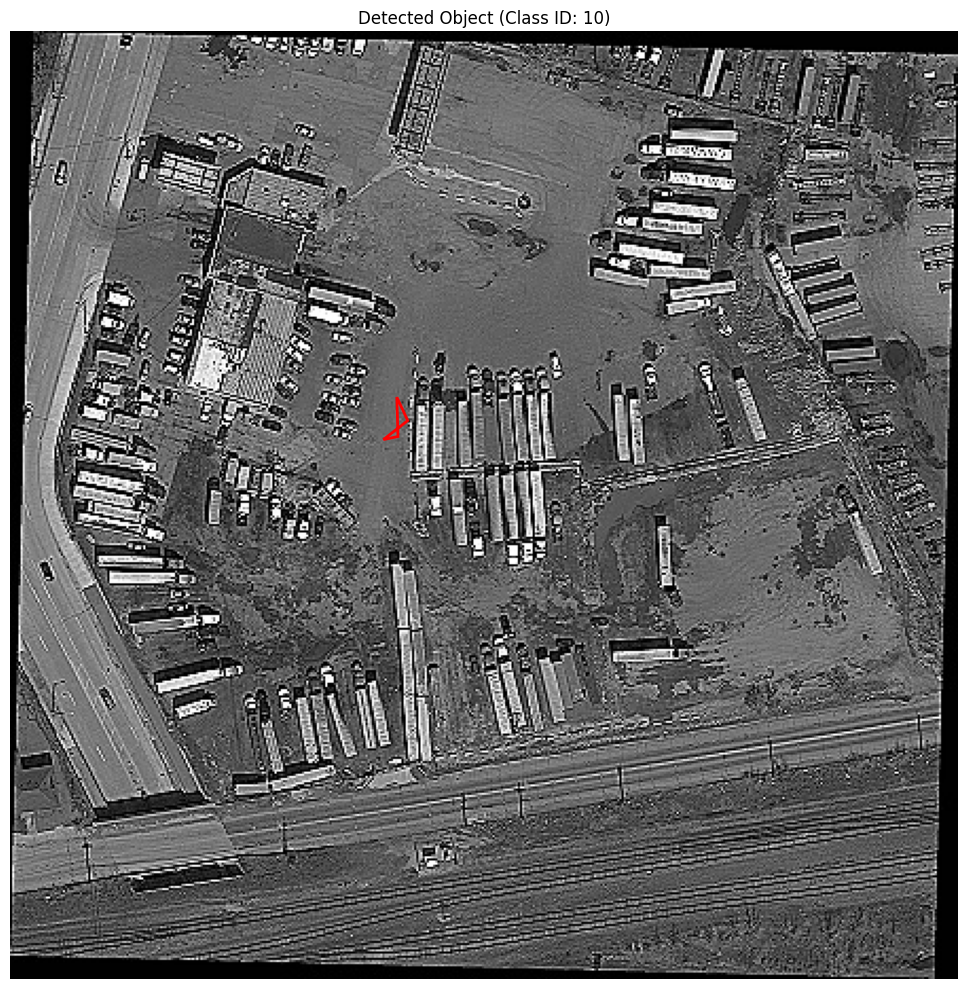

In [56]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.patches import Rectangle

# Load and preprocess the image
image_path = "DOTAv1\\preprocessed_images\\train\\P0010.jpg"
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Your existing code for prediction
img_gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
img_gray = img_gray.astype(np.float32) / 255.0
img_gray = np.expand_dims(img_gray, axis=(0, -1))
predictions = model.predict(img_gray)
class_probs, bounding_boxes = predictions
class_id = np.argmax(class_probs[0][0])
print("Class ID:", class_id)

# Extract bounding box coordinates
bbox = bounding_boxes[0][0]
x1, y1, x2, y2, x3, y3, x4, y4 = bbox

# x_top_left = x - w / 2
# y_top_left = y - h / 2

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Display the image

ax.imshow(img)
print(x1, y1, x2, y2, x3, y3, x4, y4)
# print(x, y, w ,h)
# Create a Polygon patch
polygon = Polygon([(x1*448, y1*448), (x2*448, y2*448), (x3*448, y3*448), (x4*448, y4*448)], 
                  closed=True, fill=False, edgecolor='r', linewidth=2)
# rectangle = Rectangle((x_top_left*500, y_top_left*500), w*500, h*500, linewidth=1, edgecolor='r', facecolor='none')
# ax.plot(x*500, y*500, 'bo')  # blue dot at the center

# Add the polygon to the plot
ax.add_patch(polygon)

# Set the title
ax.set_title(f"Detected Object (Class ID: {class_id})")

# Remove axis labels
ax.set_axis_off()

# Show the plot
plt.tight_layout()
plt.show()

### plane, ship, storage tank, baseball diamond, tennis court, basketball court, ground track field, harbor, bridge, large vehicle, small vehicle, helicopter, roundabout, soccer ball field and swimming pool.
